<a href="https://colab.research.google.com/github/PeaceAz/Ransomware-Classification-with-Python---Applied-Data-Analytics/blob/main/Research_Ransomware_Classification_Dimensionality_Reduction_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [ ]:
!pip install matplotlib

  Using cached matplotlib-3.7.5-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (5.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 26.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 20.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 8.8 MB/s eta 0:00:00ta 0:00:01


In [ ]:
!pip install matplotlib seaborn scipy pandas numpy dataprep


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of stack-data to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 26.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 2.8 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 35.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from dataprep.datasets import load_dataset
# from dataprep.eda import create_report
from sklearn.preprocessing import StandardScaler
import warnings

#  Suppress specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, module="dask.dataframe.utils") # To remove warnings

In [ ]:
# Phase 1: Data Collection

# pd.set_option("expand_frame_repr", False)
df= pd.read_csv('final(1).csv')

### Full Dataset

In [ ]:
df.shape  # Full dataset has 207,533 rows

(207533, 14)

In [ ]:
df = pd.DataFrame(df)
df

,50,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1.1,500,5,A.1,Bonet,5061,SS
0,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Bonet,5061,SS
1,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Bonet,5061,SS
2,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Bonet,5061,SS
3,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Bonet,5061,SS
4,41,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,520,17,A,Bonet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207528,12,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1964,2986,6081,A,UDP Scan,5062,A
207529,8,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1968,2992,6092,A,UDP Scan,5062,A
207530,8,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1972,2998,6103,A,UDP Scan,5062,A
207531,8,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1976,3004,6114,A,UDP Scan,5062,A


In [ ]:
df.columns = ['Time','Protocol','Flag','Family','Clusters','SeedAddress','ExpAddress','BTC','USD','Netflow_Bytes','IPaddress','Threats','Port','Prediction']
df.head

<bound method NDFrame.head of         Time Protocol  Flag    Family  Clusters SeedAddress ExpAddress   BTC  \
0         40      TCP     A  WannaCry         1    1DA11mPS   1BonuSr7     1   
1         30      TCP     A  WannaCry         1    1DA11mPS   1BonuSr7     1   
2         20      TCP     A  WannaCry         1    1DA11mPS   1BonuSr7     1   
3         57      TCP     A  WannaCry         1    1DA11mPS   1BonuSr7     1   
4         41      TCP     A  WannaCry         1    1DA11mPS   1BonuSr7     1   
...      ...      ...   ...       ...       ...         ...        ...   ...   
207528    12      TCP  APSF    Flyper         8    1AEoiHYZ   1SYSTEMQ  1964   
207529     8      TCP  APSF    Flyper         8    1AEoiHYZ   1SYSTEMQ  1968   
207530     8      TCP  APSF    Flyper         8    1AEoiHYZ   1SYSTEMQ  1972   
207531     8      TCP  APSF    Flyper         8    1AEoiHYZ   1SYSTEMQ  1976   
207532     8      TCP  APSF    Flyper         8    1AEoiHYZ   1SYSTEMQ  1980   

         

In [ ]:
df

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Bonet,5061,SS
1,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Bonet,5061,SS
2,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Bonet,5061,SS
3,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Bonet,5061,SS
4,41,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,520,17,A,Bonet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207528,12,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1964,2986,6081,A,UDP Scan,5062,A
207529,8,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1968,2992,6092,A,UDP Scan,5062,A
207530,8,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1972,2998,6103,A,UDP Scan,5062,A
207531,8,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1976,3004,6114,A,UDP Scan,5062,A


## Phase 2: # Data cleaning

In [ ]:
# Phase 2: # Data cleaning
# Rename attack "Bonet" to "Botnet"

df['Threats'] = df['Threats'].str.replace('Bonet', 'Botnet')
df

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Botnet,5061,SS
1,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Botnet,5061,SS
2,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Botnet,5061,SS
3,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Botnet,5061,SS
4,41,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,520,17,A,Botnet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207528,12,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1964,2986,6081,A,UDP Scan,5062,A
207529,8,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1968,2992,6092,A,UDP Scan,5062,A
207530,8,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1972,2998,6103,A,UDP Scan,5062,A
207531,8,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1976,3004,6114,A,UDP Scan,5062,A


In [ ]:
# --- Remove negative values from time/timestamp feature --- #

df['Time'] = df['Time'] + 11
df

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,51,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Botnet,5061,SS
1,41,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Botnet,5061,SS
2,31,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Botnet,5061,SS
3,68,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Botnet,5061,SS
4,52,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,520,17,A,Botnet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207528,23,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1964,2986,6081,A,UDP Scan,5062,A
207529,19,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1968,2992,6092,A,UDP Scan,5062,A
207530,19,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1972,2998,6103,A,UDP Scan,5062,A
207531,19,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1976,3004,6114,A,UDP Scan,5062,A


In [ ]:
# --- Math transformations to reduce skewness --- #

# --- Log transformation applied to column NETFLOW_BYTES --- #

df['Netflow_Bytes'] = np.log(df['Netflow_Bytes']+1)
df

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,51,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,2.197225,A,Botnet,5061,SS
1,41,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,2.079442,A,Botnet,5061,SS
2,31,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,2.772589,A,Botnet,5061,SS
3,68,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,2.302585,A,Botnet,5061,SS
4,52,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,520,2.890372,A,Botnet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207528,23,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1964,2986,8.713089,A,UDP Scan,5062,A
207529,19,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1968,2992,8.714896,A,UDP Scan,5062,A
207530,19,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1972,2998,8.716700,A,UDP Scan,5062,A
207531,19,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1976,3004,8.718500,A,UDP Scan,5062,A


In [ ]:
# --- Square root transformation applied to columns USD ---#
df['USD'] = np.sqrt(df['USD'])
df

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,51,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,22.449944,2.197225,A,Botnet,5061,SS
1,41,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,22.538855,2.079442,A,Botnet,5061,SS
2,31,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,22.627417,2.772589,A,Botnet,5061,SS
3,68,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,22.715633,2.302585,A,Botnet,5061,SS
4,52,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,22.803509,2.890372,A,Botnet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207528,23,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1964,54.644304,8.713089,A,UDP Scan,5062,A
207529,19,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1968,54.699177,8.714896,A,UDP Scan,5062,A
207530,19,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1972,54.753995,8.716700,A,UDP Scan,5062,A
207531,19,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1976,54.808758,8.718500,A,UDP Scan,5062,A


In [ ]:
# --- Yeo Johnson transformation applied to columns BTC--#
# using the stats.yeojohnson() function from library like SciPy
df['BTC'], _ = stats.yeojohnson(df['BTC'])
df

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,51,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,0.645406,22.449944,2.197225,A,Botnet,5061,SS
1,41,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,0.645406,22.538855,2.079442,A,Botnet,5061,SS
2,31,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,0.645406,22.627417,2.772589,A,Botnet,5061,SS
3,68,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,0.645406,22.715633,2.302585,A,Botnet,5061,SS
4,52,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,0.645406,22.803509,2.890372,A,Botnet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207528,23,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,3.810233,54.644304,8.713089,A,UDP Scan,5062,A
207529,19,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,3.810652,54.699177,8.714896,A,UDP Scan,5062,A
207530,19,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,3.811069,54.753995,8.716700,A,UDP Scan,5062,A
207531,19,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,3.811486,54.808758,8.718500,A,UDP Scan,5062,A


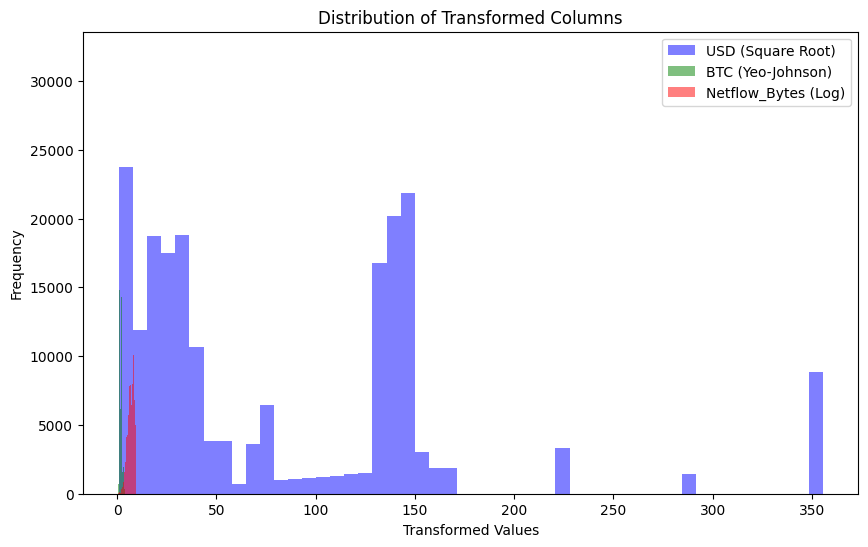

In [ ]:
#--PLOT TRANSFORMED DATA--#

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the transformed 'USD' column
ax.hist(df['USD'], bins=50, alpha=0.5, color='blue', label='USD (Square Root)')

# Plot the transformed 'BTC' column
ax.hist(df['BTC'], bins=50, alpha=0.5, color='green', label='BTC (Yeo-Johnson)')

# Plot the transformed 'Netflow_Bytes' column
ax.hist(df['Netflow_Bytes'], bins=50, alpha=0.5, color='red', label='Netflow_Bytes (Log)')

# Add labels and a legend
ax.set_xlabel('Transformed Values')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Transformed Columns')
ax.legend()

# Show the plot
plt.show()

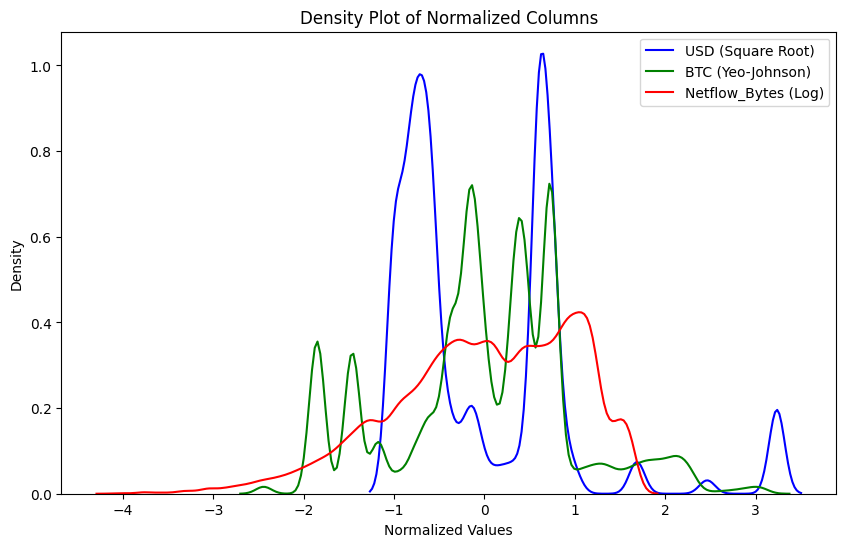

In [ ]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))
scaler = StandardScaler()

# Normalize each column's features
df_normalized = df.copy()
df_normalized[['USD', 'BTC', 'Netflow_Bytes']] = scaler.fit_transform(df[['USD', 'BTC', 'Netflow_Bytes']])

# Plot the density of the normalized 'USD' column
sns.kdeplot(df_normalized['USD'], color='blue', label='USD (Square Root)', ax=ax)

# Plot the density of the normalized 'BTC' column
sns.kdeplot(df_normalized['BTC'], color='green', label='BTC (Yeo-Johnson)', ax=ax)

# Plot the density of the normalized 'Netflow_Bytes' column
sns.kdeplot(df_normalized['Netflow_Bytes'], color='red', label='Netflow_Bytes (Log)', ax=ax)

# Add labels and a legend
ax.set_xlabel('Normalized Values')
ax.set_ylabel('Density')
ax.set_title('Density Plot of Normalized Columns')
ax.legend()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl  # Import matplotlib directly for version checking

print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version:", mpl.__version__)  # Check version of matplotlib here


Pandas version: 2.0.3
Seaborn version: 0.13.2
Matplotlib version: 3.7.5


In [ ]:
pip install --upgrade pandas seaborn matplotlib

  Using cached pandas-2.0.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached pandas-2.0.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataprep 0.4.5 requires pandas<2.0,>=1.1, but you have pandas 2.0.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


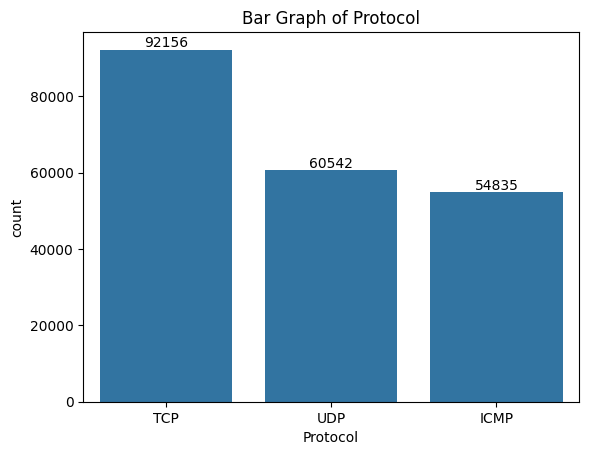

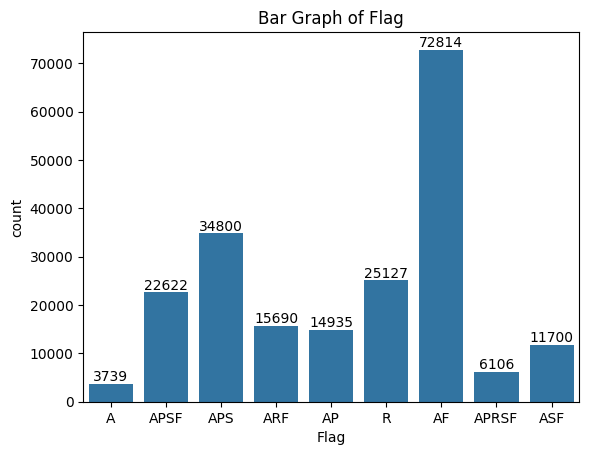

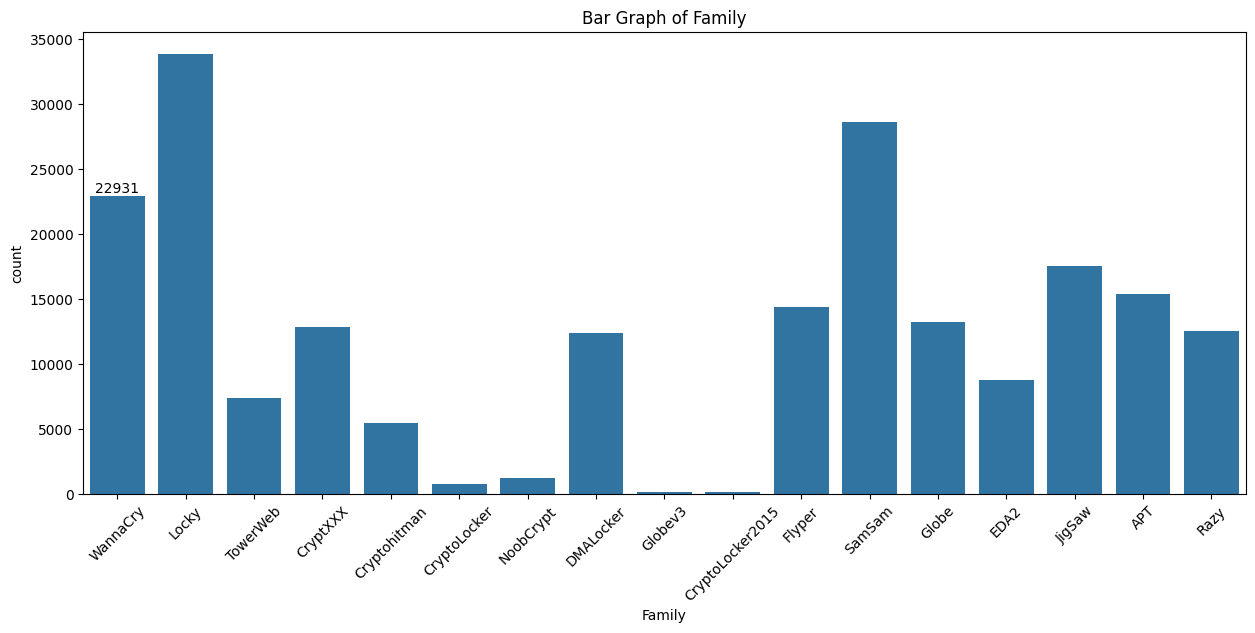

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


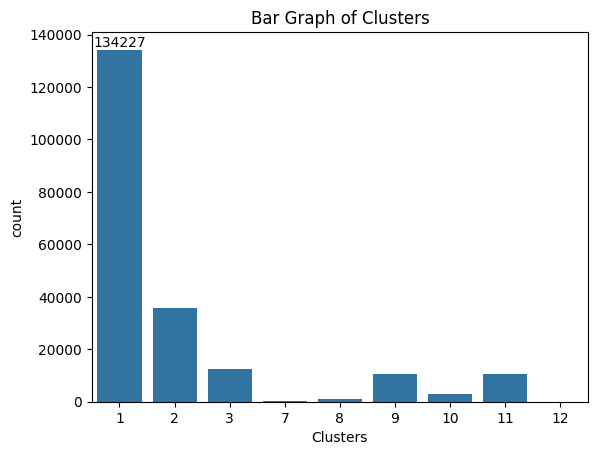

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '1DA11mPS'),
  Text(1, 0, '1NKi9AK5'),
  Text(2, 0, '1AEoiHYZ'),
  Text(3, 0, '1KZKcvx4'),
  Text(4, 0, '17dcMo4V'),
  Text(5, 0, '1GZkujBR')])

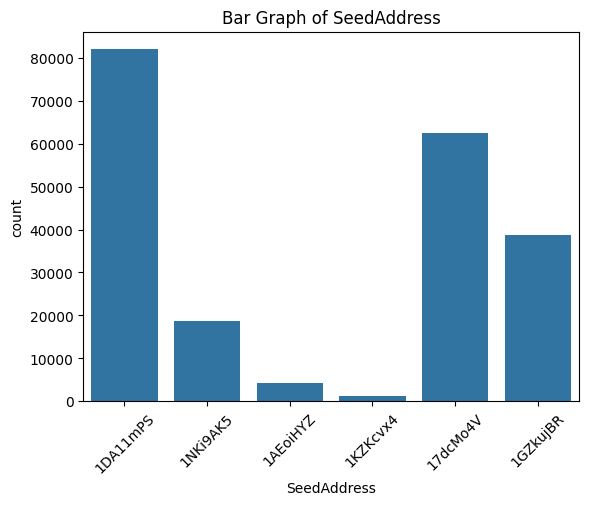

In [ ]:
# Data Visualization - Count visualizations --- #

# For Categorical count Visualizations

# Protocol count

ax = sns.countplot(x=df['Protocol'], data=df)
plt.title('Bar Graph of Protocol')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Flag count

ax = sns.countplot(x=df['Flag'], data=df)
plt.title('Bar Graph of Flag')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Family count

plt.figure(figsize=(15, 6))
ax = sns.countplot(x=df['Family'], data=df)
plt.title('Bar Graph of Family')
plt.xticks(rotation=45)
plt.xticks(fontsize=10)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

    plt.show()

# Clusters count

ax = sns.countplot(x=df['Clusters'], data=df)
plt.title('Bar Graph of Clusters')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

    plt.show()

# SeedAddress count

ax = sns.countplot(x=df['SeedAddress'], data=df)
plt.title('Bar Graph of SeedAddress')
plt.xticks(rotation=45)



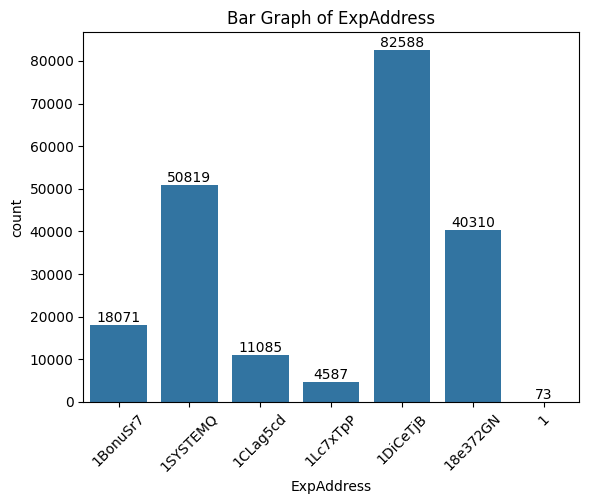

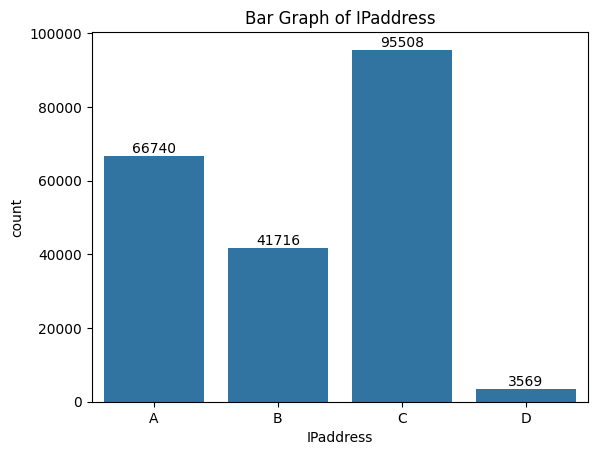

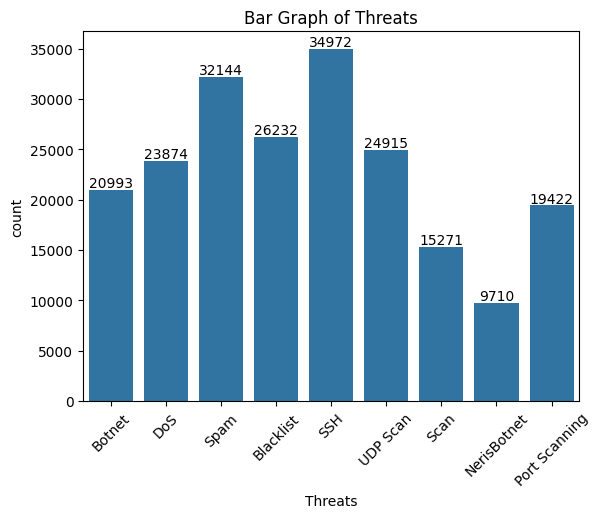

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


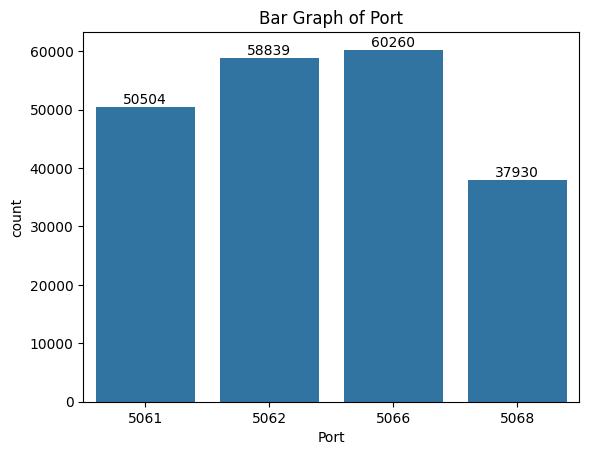

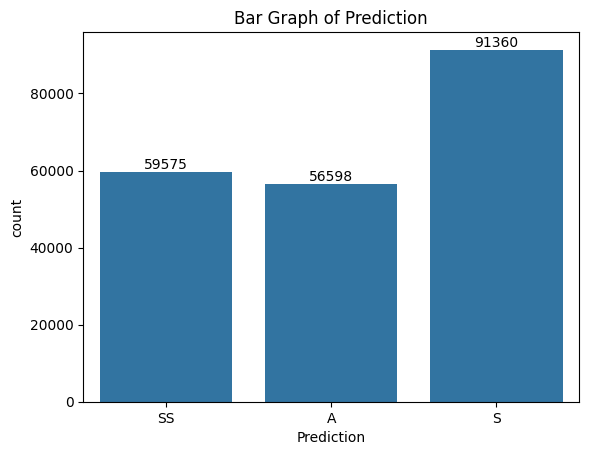

In [ ]:

# ExpAddress count

ax = sns.countplot(x=df['ExpAddress'], data=df)
plt.title('Bar Graph of ExpAddress')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# IPaddress count

ax = sns.countplot(x=df['IPaddress'], data=df)
plt.title('Bar Graph of IPaddress')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Threats count

ax = sns.countplot(x=df['Threats'], data=df)
plt.title('Bar Graph of Threats')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Port count

ax = sns.countplot(x=df['Port'], data=df)
plt.title('Bar Graph of Port')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Prediction count

ax = sns.countplot(x=df['Prediction'], data=df)
plt.title('Bar Graph of Prediction')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

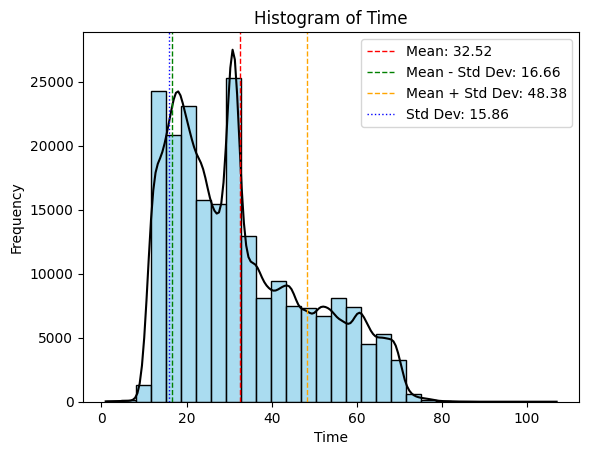

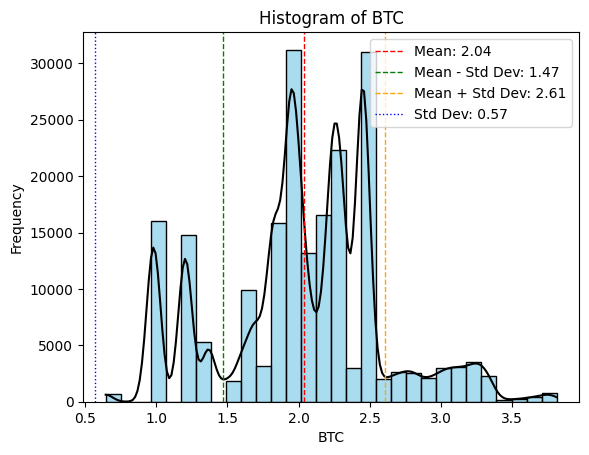

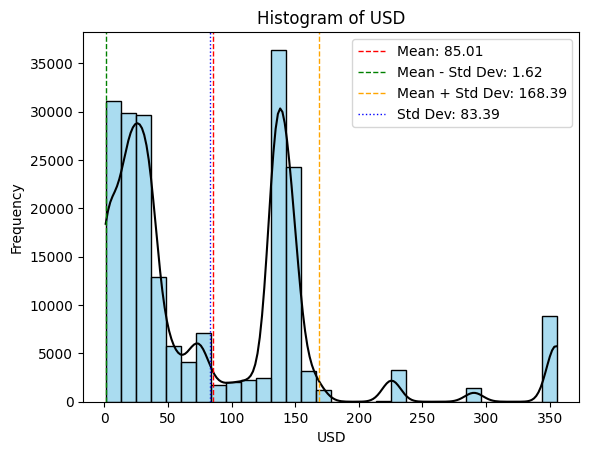

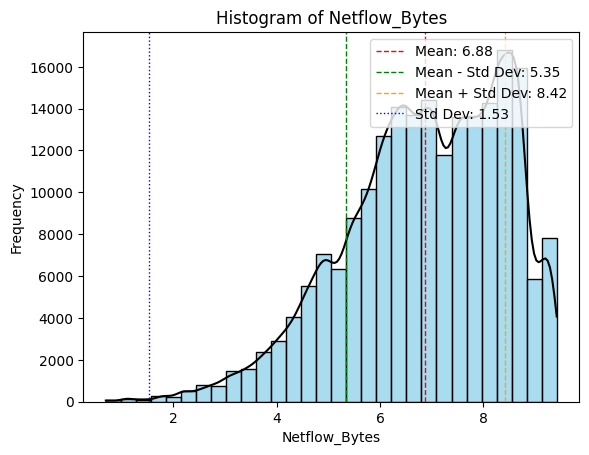

In [ ]:
# --- For Numeric visualizations (count, mean and standard deviation) --- #

# Time

feature = 'Time'
data = df[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

# # BTC

feature = 'BTC'
data = df[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

# # USD

feature = 'USD'
data = df[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

# Netflow_Bytes

feature = 'Netflow_Bytes'
data = df[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

##  Transformation of categorical variables into numerical values using LabelEncoder  in preparing data for machine learning algorithms

In [ ]:
from sklearn import preprocessing
#Each categorical column, such as 'Protocol,' 'Flag,' 'Family,' 'SeedAddress,' 'ExpAddress,' 'IPaddress,' 'Threats,' and
#'Prediction,' is encoded into unique numeric labels.
#This preprocessing step is essential for machine learning algorithms, as they typically require numerical input data
#instead of categorical labels.

lab_encoder = preprocessing.LabelEncoder()                     # transformation of categorical to numeric
df['Protocol'] = lab_encoder.fit_transform(df['Protocol'])
df['Flag'] = lab_encoder.fit_transform(df['Flag'])
df['Family'] = lab_encoder.fit_transform(df['Family'])

df['SeedAddress'] = lab_encoder.fit_transform(df['SeedAddress'])
df['ExpAddress'] = lab_encoder.fit_transform(df['ExpAddress'])
df['IPaddress'] = lab_encoder.fit_transform(df['IPaddress'])
df['Threats'] = lab_encoder.fit_transform(df['Threats'])
df['Prediction'] = lab_encoder.fit_transform(df['Prediction'])
df

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,51,1,0,16,1,2,2,0.645406,22.449944,2.197225,0,1,5061,2
1,41,1,0,16,1,2,2,0.645406,22.538855,2.079442,0,1,5061,2
2,31,1,0,16,1,2,2,0.645406,22.627417,2.772589,0,1,5061,2
3,68,1,0,16,1,2,2,0.645406,22.715633,2.302585,0,1,5061,2
4,52,1,0,16,1,2,2,0.645406,22.803509,2.890372,0,1,5061,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207528,23,1,5,7,8,1,6,3.810233,54.644304,8.713089,0,8,5062,0
207529,19,1,5,7,8,1,6,3.810652,54.699177,8.714896,0,8,5062,0
207530,19,1,5,7,8,1,6,3.811069,54.753995,8.716700,0,8,5062,0
207531,19,1,5,7,8,1,6,3.811486,54.808758,8.718500,0,8,5062,0


## Dimensionality Reduction - Experimental Datasets

### 1. Using PCA - Apply Principal Component Analysis (PCA)
#### Each sample dataset has 14 features

In [ ]:
print(df.columns)

Index(['Time', 'Protocol', 'Flag', 'Family', 'Clusters', 'SeedAddress',
       'ExpAddress', 'BTC', 'USD', 'Netflow_Bytes', 'IPaddress', 'Threats',
       'Port', 'Prediction'],
      dtype='object')


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df contains the dataset
features = df.columns  # Or specify the columns you want to apply PCA to

# Standardize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

pca = PCA(n_components=2)  # Change 2 to the desired number of components
df_pca = pca.fit_transform(df_scaled)

print(pca.explained_variance_ratio_)

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])  # Adjust names if you used more components


[0.14395829 0.12041329]


In [ ]:
df_pca

,PC1,PC2
0,1.340902,1.777742
1,1.273322,1.756065
2,0.972511,1.695835
3,1.482744,1.816867
4,1.151405,1.745570
...,...,...
207528,1.339433,-1.858132
207529,1.298439,-1.869534
207530,1.298001,-1.870214
207531,1.297563,-1.870893


In [ ]:
# Apply LazyPredict to pca dataset
# - Only 2 Components isnt enough, rather we do 95% as below

# 1. Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df contains the original dataset and y contains the target variable
X = df.drop(columns=['Prediction'])
y = df['Prediction']

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA (reduce to 2 components, adjust as necessary)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 5. Apply LazyPredict on the PCA-transformed data
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# 6. View the results
print(models)


/root/ransomware_classification/datascience_env/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
 97%|██████████████████████████████████████▌ | 28/29 [1:21:03<04:55, 295.49s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 166026, number of used features: 2
[LightGBM] [Info] Start training from score -1.298043
[LightGBM] [Info] Start training from score -0.822425
[LightGBM] [Info] Start training from score -1.246291


100%|████████████████████████████████████████| 29/29 [1:21:04<00:00, 167.75s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.87               0.86    None      0.87   
ExtraTreesClassifier               0.87               0.86    None      0.87   
BaggingClassifier                  0.87               0.86    None      0.87   
DecisionTreeClassifier             0.86               0.85    None      0.86   
ExtraTreeClassifier                0.83               0.81    None      0.83   
KNeighborsClassifier               0.80               0.79    None      0.80   
XGBClassifier                      0.77               0.75    None      0.77   
LGBMClassifier                     0.75               0.73    None      0.75   
SVC                                0.68               0.64    None      0.67   
QuadraticDiscriminantAnalysis      0.67               0.63    None      0.66   
LogisticRegression                 0.66 

In [ ]:
# apply PCA and LazyPredict on the dataset df

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Assuming df is the dataframe and target is the column you want to predict
X = df.drop(columns=['Prediction'])  # Replace 'target_column' with the actual target column name
y = df['Prediction']  # Replace 'target_column' with the actual target column name

# Standardizing the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Apply LazyPredict
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display the results
print(models)


 97%|███████████████████████████████████████▌ | 28/29 [1:21:04<01:25, 85.53s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 145273, number of used features: 12
[LightGBM] [Info] Start training from score -1.297541
[LightGBM] [Info] Start training from score -0.822877
[LightGBM] [Info] Start training from score -1.246077


100%|████████████████████████████████████████| 29/29 [1:21:07<00:00, 167.84s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               0.99               0.99    None      0.99   
RandomForestClassifier             0.99               0.99    None      0.99   
BaggingClassifier                  0.99               0.99    None      0.99   
LabelPropagation                   0.99               0.99    None      0.99   
DecisionTreeClassifier             0.99               0.99    None      0.99   
XGBClassifier                      0.99               0.99    None      0.99   
KNeighborsClassifier               0.99               0.99    None      0.99   
ExtraTreeClassifier                0.98               0.98    None      0.98   
LGBMClassifier                     0.98               0.98    None      0.98   
SVC                                0.97               0.97    None      0.97   
NuSVC                              0.88 

In [ ]:
# View the Shape of the PCA Dataset

print(X_pca.shape)

(207533, 12)


In [ ]:
# Import necessary packages
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score
import pandas as pd

# Assuming your dataset is already loaded as df and target variable y is defined
X = X_pca  # Use the PCA-transformed dataset
y = df['Prediction']  # Replace 'target_column' with the name of your target column

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Train models and predict
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Define your custom metrics and add them to the DataFrame
for model_name in models.index:
    y_pred = predictions[model_name]

    # Compute various metrics
    models.loc[model_name, 'Accuracy'] = accuracy_score(y_test, y_pred)
    models.loc[model_name, 'Balanced Accuracy'] = balanced_accuracy_score(y_test, y_pred)

    # Check if ROC AUC can be computed (must have binary or probability predictions)
    if len(set(y_test)) == 2:
        models.loc[model_name, 'ROC AUC'] = roc_auc_score(y_test, y_pred)
    else:
        models.loc[model_name, 'ROC AUC'] = 'None'

    models.loc[model_name, 'F1 Score'] = f1_score(y_test, y_pred, average='weighted')

# Display the results in the format you need
models = models[['Accuracy', 'Balanced Accuracy', 'ROC AUC', 'F1 Score', 'Time Taken']]
print(models)


 97%|█████████████████████████████████████████▌ | 28/29 [51:32<01:23, 83.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 145273, number of used features: 12
[LightGBM] [Info] Start training from score -1.297541
[LightGBM] [Info] Start training from score -0.822877
[LightGBM] [Info] Start training from score -1.246077


100%|██████████████████████████████████████████| 29/29 [51:33<00:00, 106.69s/it]


KeyError: 'ExtraTreesClassifier'

In [ ]:
print(models.index)  # Check the model names
print(predictions.keys())  # Check the keys in predictions


Index(['ExtraTreesClassifier', 'RandomForestClassifier', 'BaggingClassifier',
       'DecisionTreeClassifier', 'XGBClassifier', 'KNeighborsClassifier',
       'ExtraTreeClassifier', 'LGBMClassifier', 'SVC', 'NuSVC',
       'QuadraticDiscriminantAnalysis', 'AdaBoostClassifier',
       'LogisticRegression', 'SGDClassifier', 'CalibratedClassifierCV',
       'LinearSVC', 'RidgeClassifier', 'RidgeClassifierCV',
       'LinearDiscriminantAnalysis', 'GaussianNB', 'NearestCentroid',
       'BernoulliNB', 'Perceptron', 'PassiveAggressiveClassifier',
       'DummyClassifier'],
      dtype='object', name='Model')
Index(['Accuracy', 'Balanced Accuracy', 'ROC AUC', 'F1 Score', 'Time Taken'], dtype='object')


In [ ]:
# Define your custom metrics and add them to the DataFrame
for model_name in models.index:  # Iterate over the available model names in models
    if model_name in predictions:  # Check if the model_name exists in predictions
        y_pred = predictions[model_name]

        # Compute various metrics
        models.loc[model_name, 'Accuracy'] = accuracy_score(y_test, y_pred)
        models.loc[model_name, 'Balanced Accuracy'] = balanced_accuracy_score(y_test, y_pred)

        # Check if ROC AUC can be computed (must have binary or probability predictions)
        if len(set(y_test)) == 2:
            models.loc[model_name, 'ROC AUC'] = roc_auc_score(y_test, y_pred)
        else:
            models.loc[model_name, 'ROC AUC'] = 'None'

        models.loc[model_name, 'F1 Score'] = f1_score(y_test, y_pred, average='weighted')

# Display the results in the format you need
models = models[['Accuracy', 'Balanced Accuracy', 'ROC AUC', 'F1 Score', 'Time Taken']]
print(models)


                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               0.99               0.99    None      0.99   
RandomForestClassifier             0.99               0.99    None      0.99   
BaggingClassifier                  0.99               0.99    None      0.99   
DecisionTreeClassifier             0.99               0.99    None      0.99   
XGBClassifier                      0.99               0.99    None      0.99   
KNeighborsClassifier               0.99               0.99    None      0.99   
ExtraTreeClassifier                0.98               0.98    None      0.98   
LGBMClassifier                     0.98               0.98    None      0.98   
SVC                                0.97               0.97    None      0.97   
NuSVC                              0.88               0.86    None      0.88   
QuadraticDiscriminantAnalysis      0.80 

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your dataframe after preprocessing
# Separate features and target
X = df.drop(columns=['Prediction'])  # 'Prediction' is the target column
y = df['Prediction']  # 'Prediction' is the target column

# Standardizing the features (PCA is affected by scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)  # Number of components can be changed as needed
principal_components = pca.fit_transform(X_scaled)

# Create a dataframe with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Concatenate the target variable for reference (optional)
# final_df = pd.concat([pca_df, y.reset_index(drop=True)], axis=1)

# Print explained variance ratio to see how much variance is captured by each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Show the final dataframe with principal components
print(pca_df.head())


Explained variance ratio: [0.14395687 0.120411  ]
   Principal Component 1  Principal Component 2
0               1.330531               1.789990
1               1.262337               1.769181
2               0.962550               1.708220
3               1.473237               1.827819
4               1.142483               1.756381


In [ ]:
df.keys # To know what the dataset is about
# Prediction is the target


<bound method NDFrame.keys of         Time  Protocol  Flag  Family  Clusters  SeedAddress  ExpAddress  \
0         51         1     0      16         1            2           2   
1         41         1     0      16         1            2           2   
2         31         1     0      16         1            2           2   
3         68         1     0      16         1            2           2   
4         52         1     0      16         1            2           2   
...      ...       ...   ...     ...       ...          ...         ...   
207528    23         1     5       7         8            1           6   
207529    19         1     5       7         8            1           6   
207530    19         1     5       7         8            1           6   
207531    19         1     5       7         8            1           6   
207532    19         1     5       7         8            1           6   

             BTC        USD  Netflow_Bytes  IPaddress  Threats  Port 

In [ ]:
X_scaled

array([[ 1.16494873, -0.03690628, -1.42129462, ..., -1.18419188,
        -1.10749527,  1.31763728],
       [ 0.53456492, -0.03690628, -1.42129462, ..., -1.18419188,
        -1.10749527,  1.31763728],
       [-0.0958189 , -0.03690628, -1.42129462, ..., -1.18419188,
        -1.10749527,  1.31763728],
       ...,
       [-0.85227948, -0.03690628,  0.5441779 , ...,  1.42693109,
        -0.74012984, -1.35598968],
       [-0.85227948, -0.03690628,  0.5441779 , ...,  1.42693109,
        -0.74012984, -1.35598968],
       [-0.85227948, -0.03690628,  0.5441779 , ...,  1.42693109,
        -0.74012984, -1.35598968]])

In [ ]:
# Apply PCA
from sklearn.decomposition import PCA

pca = PCA(0.95)  # Number of components can be changed as needed
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

# NOTE: X_scaled gives me 13 columns as X_pca is on the full dataset
# It  removed unnecessary only 1 columns that has zero for example like the ip address column
# NB: It does not just pick away full columns, it calculates new columns from all the columns

(207533, 13)

In [ ]:
X_pca  # using X_scaled gives 13 columns

array([[ 1.34457463,  1.76677468, -2.59421518, ...,  0.21728642,
        -0.89505492,  2.03194777],
       [ 1.27688857,  1.74537294, -2.56140796, ...,  0.28262276,
        -0.88047346,  2.06860991],
       [ 0.9758632 ,  1.68590471, -2.367673  , ...,  0.23470001,
        -0.64657491,  1.93642163],
       ...,
       [ 1.29727407, -1.86777321,  1.47211853, ..., -1.0418528 ,
         0.72710751, -0.57012231],
       [ 1.29683498, -1.86844898,  1.47246202, ..., -1.04234464,
         0.72740547, -0.57095737],
       [ 1.29639656, -1.86912358,  1.47280459, ..., -1.04283543,
         0.72770296, -0.57179095]])

In [ ]:
X_pca.shape

(207533, 13)

In [ ]:
y

0         2
1         2
2         2
3         2
4         2
         ..
207528    0
207529    0
207530    0
207531    0
207532    0
Name: Prediction, Length: 207533, dtype: int64

In [ ]:
pca.explained_variance_ratio_  # For X_scaled showed the 13 columns
# This shows that my first column (pc1 component) is capturing 15% variation of useful information from my dataset
# pc2 my 2nd component is capturing almost 13%, pc3 capturing almost 11%, pc4 capturing 9% and so on.

array([0.14395839, 0.12041407, 0.1047603 , 0.0948661 , 0.08860209,
       0.07153514, 0.06663385, 0.0603742 , 0.05684638, 0.05241837,
       0.04514589, 0.03838623, 0.03019501])

In [ ]:
pca.n_components_  # shows how many components that ive got

# NOTE: PCA help reduce my columns from 14 to 12 without loosing important information

13

In [ ]:
pca.n_components # shows the % captured totally on the pca components i.e captured 95% of the important info in the dataset which is great!

0.95

In [ ]:
y_pca = y

In [ ]:
y_pca.shape

(207533,)

In [ ]:
# Now use new dataframe to traim the model using pca
from sklearn.model_selection import train_test_split  # library for machine learning models

# Splitting the dataset into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 42)

# Now you can use X_train_pca, X_test_pca, y_train, y_test for modeling

In [ ]:
# PCA

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42) #  It specifies the number of trees in the Random Forest.
#In this case, there are 100 trees in the forest

model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

# model_pred=model.predict(X_test_pca)

0.999951815356446

In [ ]:
# NB:
# Yay!!! PCA gave me over 99.9% prediction

### 1. Using Full Dataset

In [ ]:
df

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,51,1,0,16,1,2,2,0.645406,22.449944,2.197225,0,1,5061,2
1,41,1,0,16,1,2,2,0.645406,22.538855,2.079442,0,1,5061,2
2,31,1,0,16,1,2,2,0.645406,22.627417,2.772589,0,1,5061,2
3,68,1,0,16,1,2,2,0.645406,22.715633,2.302585,0,1,5061,2
4,52,1,0,16,1,2,2,0.645406,22.803509,2.890372,0,1,5061,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207528,23,1,5,7,8,1,6,3.810233,54.644304,8.713089,0,8,5062,0
207529,19,1,5,7,8,1,6,3.810652,54.699177,8.714896,0,8,5062,0
207530,19,1,5,7,8,1,6,3.811069,54.753995,8.716700,0,8,5062,0
207531,19,1,5,7,8,1,6,3.811486,54.808758,8.718500,0,8,5062,0


### Lazypredict on Full dataset

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Prediction is your target column

X = df.drop(columns=['Prediction'])  # Features
y = df['Prediction']                  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit LazyClassifier
lazy_classifier = LazyClassifier()
models = lazy_classifier.fit(X_train, X_test, y_train, y_test)

# Display the results
print(models)

/root/ransomware_classification/datascience_env/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 28/29 [1:20:32<01:02, 62.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 166026, number of used features: 13
[LightGBM] [Info] Start training from score -1.298043
[LightGBM] [Info] Start training from score -0.822425
[LightGBM] [Info] Start training from score -1.246291


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [1:20:33<00:00, 166.69s/it]

(                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
BaggingClassifier                  1.00               1.00    None      1.00   
RandomForestClassifier             1.00               1.00    None      1.00   
DecisionTreeClassifier             1.00               1.00    None      1.00   
LGBMClassifier                     1.00               1.00    None      1.00   
ExtraTreesClassifier               1.00               1.00    None      1.00   
XGBClassifier                      1.00               1.00    None      1.00   
ExtraTreeClassifier                0.99               0.99    None      0.99   
LabelPropagation                   0.99               0.99    None      0.99   
KNeighborsClassifier               0.99               0.99    None      0.99   
SVC                                0.97               0.97    None      0.97   
NuSVC                              0.88

##### Split dataset into training and testing sets

In [ ]:
#common procedure in machine learning for splitting a dataset into training and testing sets using the train_test_split function
#from scikit-learn. Here's a breakdown of what each line of code does:

X = df.iloc[:, :-1] #This line selects all rows and all columns of the DataFrame df2 except for the last column.
#It's assuming that the last column contains the target variable or labels, and X will contain all the feature columns

y = df.iloc[:, +1]  # This line selects all rows but only the last column of the DataFrame df2.
#This is to isolate the target variable or labels, and y will contain these labels.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)  #split test and train into 4 parts
#This line uses the train_test_split function to split the data into training and testing sets.
#Here's a breakdown of the parameters:

#X and y: The feature matrix and target variable.
#train_size=0.8: This parameter specifies that 80% of the data should be used for training
#(you can adjust this percentage as needed).
#random_state=42: This parameter sets the random seed for reproducibility, ensuring that the split is the same each time you
#run the code.

In [ ]:
X_train

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port
137891,16,1,5,16,1,2,4,1.20,36.25,6.89,2,5,5068
171534,14,0,8,1,1,2,6,2.30,135.72,8.14,2,0,5062
14555,36,1,1,11,1,2,2,2.45,146.10,5.67,2,7,5061
30543,31,0,4,13,2,0,4,2.59,7.28,8.96,1,8,5061
26080,31,2,1,8,1,2,2,1.94,146.10,6.50,0,7,5062
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,20,1,1,11,1,5,6,1.83,164.92,8.77,0,7,5061
103694,40,1,8,7,1,5,6,1.83,133.90,8.68,1,4,5066
131932,31,2,4,10,2,0,4,2.86,13.11,9.29,1,1,5061
146867,56,1,4,6,2,3,4,1.37,35.51,6.71,3,5,5062


In [ ]:
X_test

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port
25246,36,1,1,14,1,2,2,2.45,146.10,5.67,2,6,5061
68202,20,1,1,14,1,2,4,2.45,146.10,5.35,2,6,5061
84534,27,1,1,14,1,0,4,2.45,146.10,5.55,2,8,5061
68799,27,0,1,14,1,0,4,2.45,22.34,7.85,2,2,5066
199915,31,0,1,11,1,0,4,2.45,22.14,7.86,2,5,5066
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170917,12,2,6,8,1,2,4,2.03,135.85,5.85,0,0,5061
10912,41,1,5,1,1,2,2,1.20,73.95,7.42,2,1,5068
42789,51,1,1,1,10,0,3,2.45,29.43,6.66,2,1,5061
26748,21,1,5,8,1,2,2,1.20,35.92,6.82,2,2,5068


In [ ]:
y_train

137891    1
171534    0
14555     1
30543     0
26080     2
         ..
119879    1
103694    1
131932    2
146867    1
121958    0
Name: Protocol, Length: 166026, dtype: int64

In [ ]:
y_test

25246     1
68202     1
84534     1
68799     0
199915    0
         ..
170917    2
10912     1
42789     1
26748     1
38115     2
Name: Protocol, Length: 41507, dtype: int64

##### Evaluate best model and DummyClassifier (weakest model) for df (full dataset)


In [ ]:
df

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,51,1,0,16,1,2,2,0.65,22.45,2.20,0,1,5061,2
1,41,1,0,16,1,2,2,0.65,22.54,2.08,0,1,5061,2
2,31,1,0,16,1,2,2,0.65,22.63,2.77,0,1,5061,2
3,68,1,0,16,1,2,2,0.65,22.72,2.30,0,1,5061,2
4,52,1,0,16,1,2,2,0.65,22.80,2.89,0,1,5061,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207528,23,1,5,7,8,1,6,3.81,54.64,8.71,0,8,5062,0
207529,19,1,5,7,8,1,6,3.81,54.70,8.71,0,8,5062,0
207530,19,1,5,7,8,1,6,3.81,54.75,8.72,0,8,5062,0
207531,19,1,5,7,8,1,6,3.81,54.81,8.72,0,8,5062,0


#### Training Time, Prediction Time, Accuracy, Classification Report, Confusion Matrix and Plot ROC AUC for Best Model and Weakest Model for Df (Full dataset)



Evaluating Best Model: BaggingClassifier
Model: BaggingClassifier
Training Time: 1.14 seconds
Prediction Time: 0.03 seconds
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10869
           1       1.00      1.00      1.00     18452
           2       1.00      1.00      1.00     12186

    accuracy                           1.00     41507
   macro avg       1.00      1.00      1.00     41507
weighted avg       1.00      1.00      1.00     41507



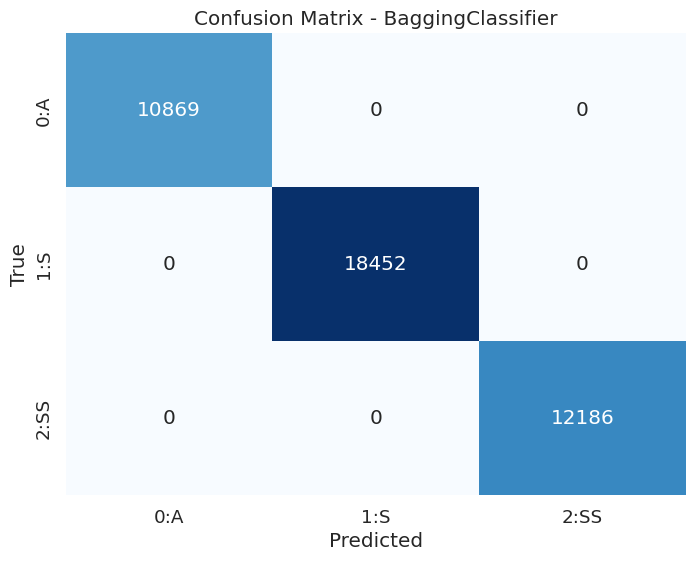


Evaluating Best Model: RandomForestClassifier
Model: RandomForestClassifier
Training Time: 9.06 seconds
Prediction Time: 0.28 seconds
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10869
           1       1.00      1.00      1.00     18452
           2       1.00      1.00      1.00     12186

    accuracy                           1.00     41507
   macro avg       1.00      1.00      1.00     41507
weighted avg       1.00      1.00      1.00     41507



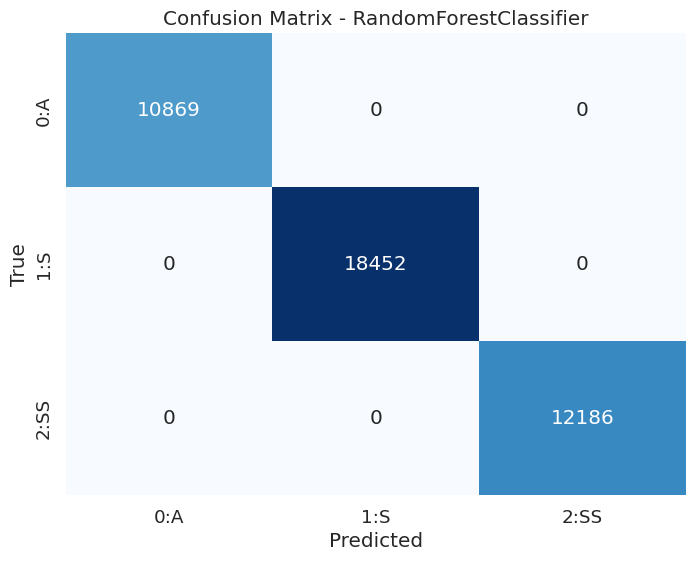


Evaluating Best Model: DecisionTreeClassifier
Model: DecisionTreeClassifier
Training Time: 0.16 seconds
Prediction Time: 0.00 seconds
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10869
           1       1.00      1.00      1.00     18452
           2       1.00      1.00      1.00     12186

    accuracy                           1.00     41507
   macro avg       1.00      1.00      1.00     41507
weighted avg       1.00      1.00      1.00     41507



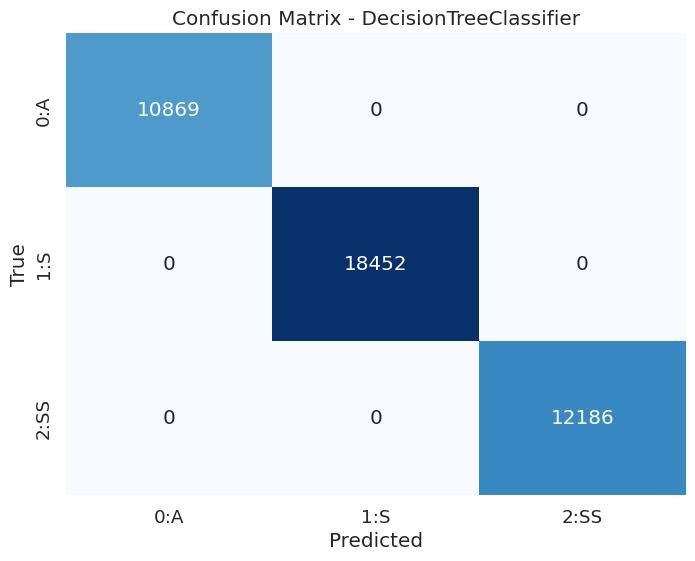


Evaluating Best Model: LGBMClassifier
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 166026, number of used features: 13
[LightGBM] [Info] Start training from score -1.328728
[LightGBM] [Info] Start training from score -0.812087
[LightGBM] [Info] Start training from score -1.233554
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

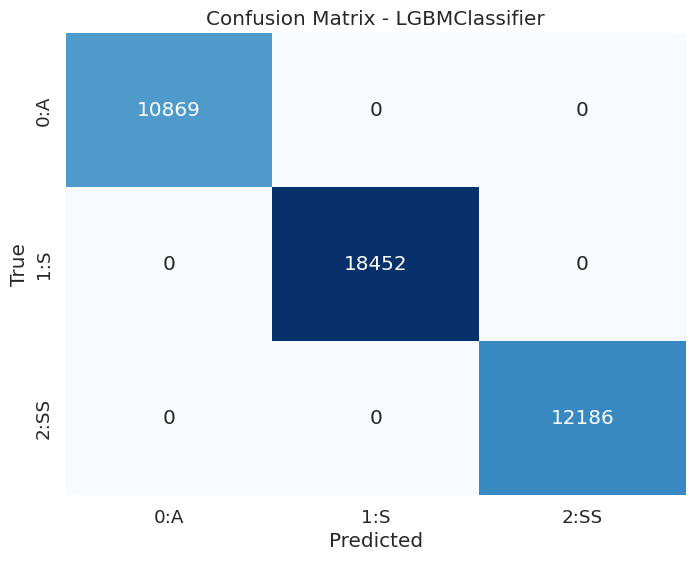


Evaluating Best Model: ExtraTreesClassifier
Model: ExtraTreesClassifier
Training Time: 6.60 seconds
Prediction Time: 0.33 seconds
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10869
           1       1.00      1.00      1.00     18452
           2       1.00      1.00      1.00     12186

    accuracy                           1.00     41507
   macro avg       1.00      1.00      1.00     41507
weighted avg       1.00      1.00      1.00     41507



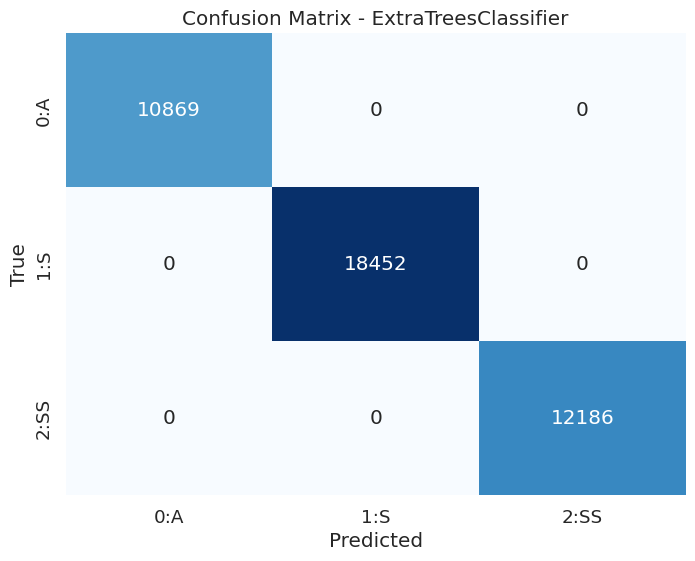


Evaluating Best Model: XGBClassifier
Model: XGBClassifier
Training Time: 0.60 seconds
Prediction Time: 0.01 seconds
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10869
           1       1.00      1.00      1.00     18452
           2       1.00      1.00      1.00     12186

    accuracy                           1.00     41507
   macro avg       1.00      1.00      1.00     41507
weighted avg       1.00      1.00      1.00     41507



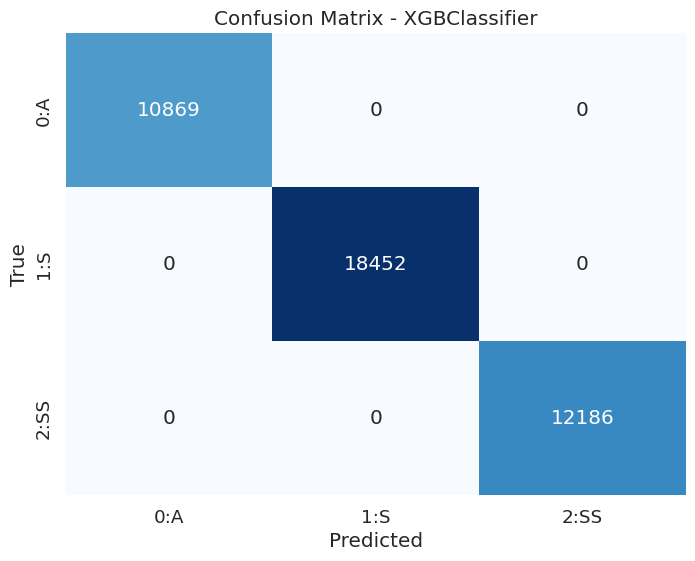


Evaluating Weakest Model: DummyClassifier
Model: DummyClassifier
Training Time: 0.01 seconds
Prediction Time: 0.00 seconds
Accuracy: 0.445
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     10869
           1       0.44      1.00      0.62     18452
           2       0.00      0.00      0.00     12186

    accuracy                           0.44     41507
   macro avg       0.15      0.33      0.21     41507
weighted avg       0.20      0.44      0.27     41507



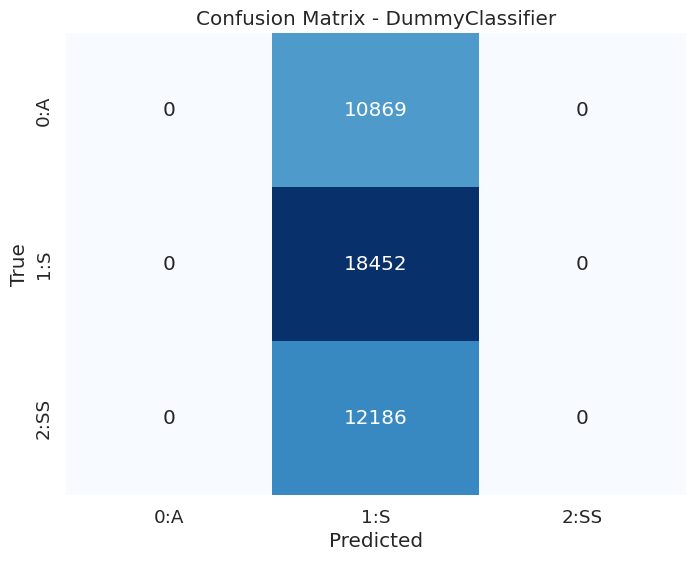

In [ ]:
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already split the data into X_train, X_test, y_train, y_test

# List of best models to evaluate
best_models = [
    BaggingClassifier(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    LGBMClassifier(),
    ExtraTreesClassifier(),
    XGBClassifier()
]

# Dummy classifier as the weakest model
weakest_model = DummyClassifier(strategy='most_frequent')

# Function to evaluate models
def evaluate_model(model_class, X_train, y_train, X_test, y_test):
    # Start the timer
    start_time = time.time()

    # Train the model
    model_class.fit(X_train, y_train)

    # Stop the timer after training
    end_time_training = time.time()

    # Make predictions on the test set
    preds = model_class.predict(X_test)

    # Stop the timer after prediction
    end_time_prediction = time.time()

    # Calculate metrics
    accuracy = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds)
    matrix = confusion_matrix(y_test, preds)

    # Calculate elapsed time
    training_time = end_time_training - start_time
    prediction_time = end_time_prediction - end_time_training

    # Display metrics
    print(f"Model: {model_class.__class__.__name__}")
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"Prediction Time: {prediction_time:.2f} seconds")
    print(f"Accuracy: {round(accuracy, 3)}")
    print("Classification Report:\n", report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {model_class.__class__.__name__}")
    plt.show()

# Evaluate all best models
for model in best_models:
    print(f"\nEvaluating Best Model: {model.__class__.__name__}")
    evaluate_model(model, X_train, y_train, X_test, y_test)

# Evaluate the weakest model
print(f"\nEvaluating Weakest Model: DummyClassifier")
evaluate_model(weakest_model, X_train, y_train, X_test, y_test)


Model: BaggingClassifier
ROC AUC: 1.0
Time taken: 1.16 seconds

Model: RandomForestClassifier
ROC AUC: 1.0
Time taken: 8.79 seconds

Model: DecisionTreeClassifier
ROC AUC: 1.0
Time taken: 0.19 seconds

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 145273, number of used features: 13
[LightGBM] [Info] Start training from score -1.332982
[LightGBM] [Info] Start training from score -0.809302
[LightGBM] [Info] Start training from score -1.233946
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

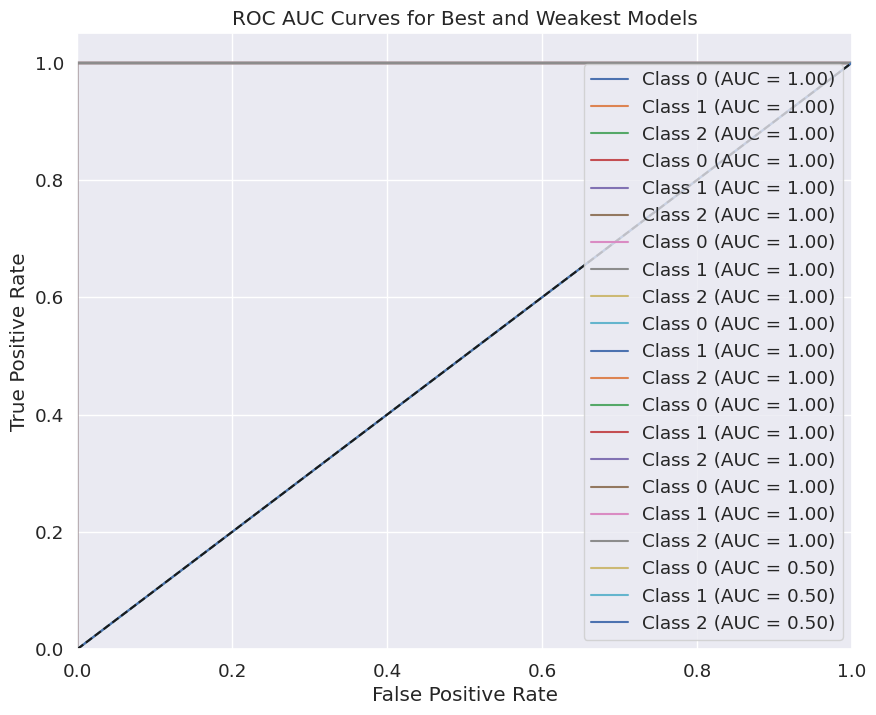

In [ ]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Initialize the classifiers
best_models = {
    "BaggingClassifier": BaggingClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "XGBClassifier": XGBClassifier()
}

weakest_model = DummyClassifier(strategy='most_frequent')

# Function to evaluate ROC AUC and plot the curve
def plot_roc_auc(model, X_train, y_train, X_test, y_test, n_classes):
    # Start the timer
    start_time = time.time()

    # If the model doesn't support `predict_proba`, use OneVsRestClassifier wrapper
    if not hasattr(model, 'predict_proba'):
        model = OneVsRestClassifier(model)

    # Train the model using the 1D target
    model.fit(X_train, y_train.ravel())  # y_train.ravel() converts y_train to 1D

    # Make probability predictions
    y_probs = model.predict_proba(X_test)  # Probabilities for all classes

    # Calculate ROC AUC for multi-class
    auc = roc_auc_score(y_test, y_probs, multi_class='ovr')  # 'ovr' is one-vs-rest

    # Calculate ROC curve for each class and plot
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test[:, i], y_probs[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')

    print(f"Model: {model.__class__.__name__}")
    print(f"ROC AUC: {round(auc, 3)}")

    # Stop the timer after training
    end_time = time.time()
    print(f"Time taken: {round(end_time - start_time, 2)} seconds\n")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Binarize the labels for multi-class ROC AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust based on your classes

n_classes = y_test_bin.shape[1]

# Plot ROC AUC curves for the best models
plt.figure(figsize=(10, 8))

for name, model in best_models.items():
    plot_roc_auc(model, X_train, y_train, X_test, y_test_bin, n_classes)

# Plot ROC AUC for the weakest model
plot_roc_auc(weakest_model, X_train, y_train, X_test, y_test_bin, n_classes)

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves for Best and Weakest Models')
plt.legend(loc='lower right')
plt.show()

# Plotted all the best models on one ROC AUC visualisation

Model: BaggingClassifier
ROC AUC: 1.0
Time taken: 1.17 seconds

Model: RandomForestClassifier
ROC AUC: 1.0
Time taken: 8.25 seconds

Model: DecisionTreeClassifier
ROC AUC: 1.0
Time taken: 0.19 seconds

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 145273, number of used features: 13
[LightGBM] [Info] Start training from score -1.332982
[LightGBM] [Info] Start training from score -0.809302
[LightGBM] [Info] Start training from score -1.233946
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

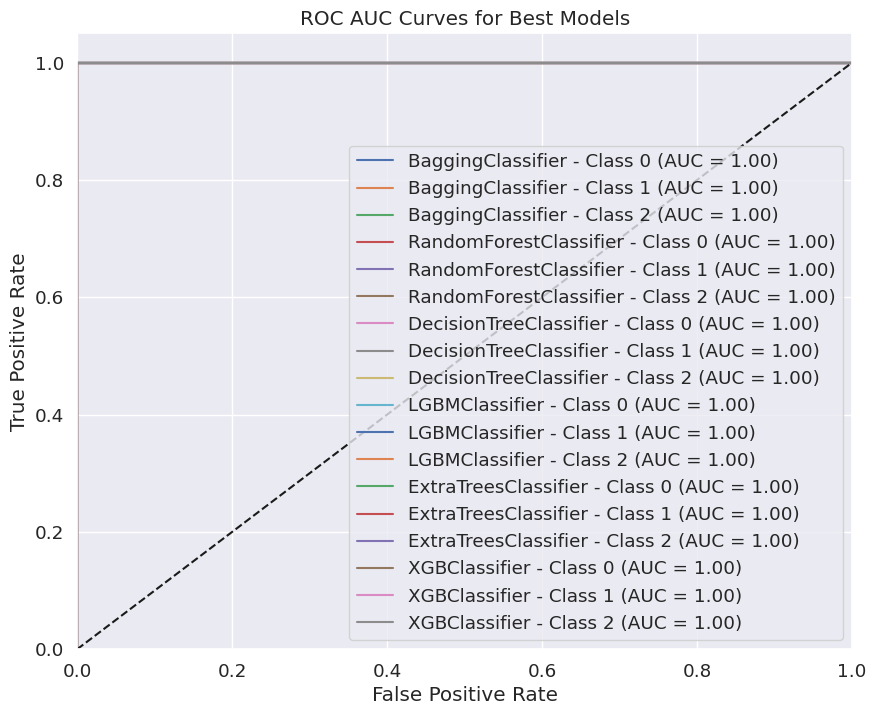

Model: DummyClassifier
ROC AUC: 0.5
Time taken: 0.06 seconds



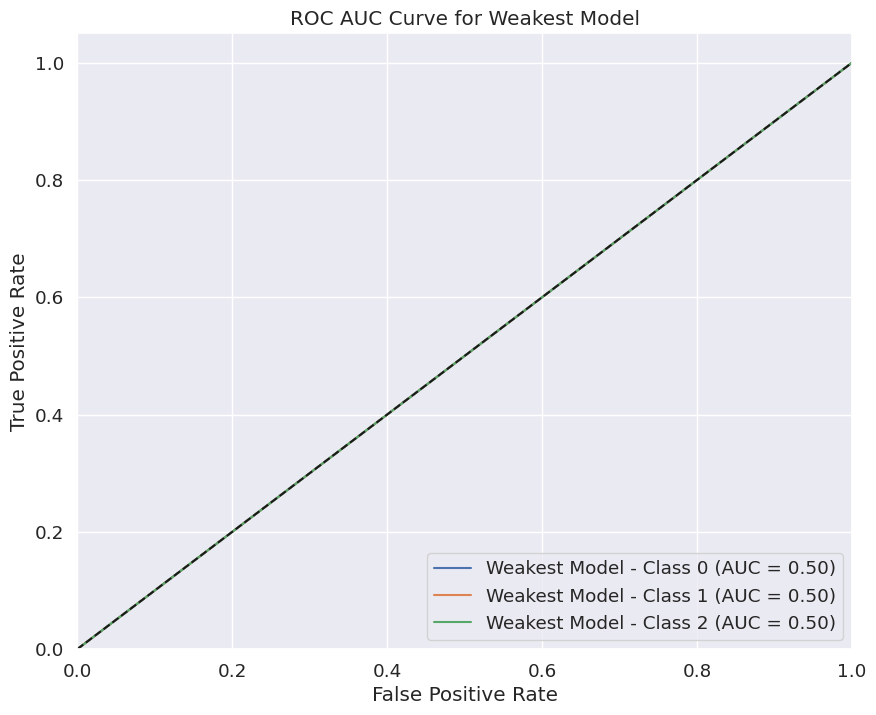

In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Initialize the classifiers
best_models = {
    "BaggingClassifier": BaggingClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "XGBClassifier": XGBClassifier()
}

weakest_model = DummyClassifier(strategy='most_frequent')

# Function to evaluate ROC AUC and plot the curve
def plot_roc_auc(model, X_train, y_train, X_test, y_test, n_classes, label_prefix=''):
    # Start the timer
    start_time = time.time()

    # If the model doesn't support `predict_proba`, use OneVsRestClassifier wrapper
    if not hasattr(model, 'predict_proba'):
        model = OneVsRestClassifier(model)

    # Train the model using the 1D target
    model.fit(X_train, y_train.ravel())  # y_train.ravel() converts y_train to 1D

    # Make probability predictions
    y_probs = model.predict_proba(X_test)  # Probabilities for all classes

    # Calculate ROC AUC for multi-class
    auc = roc_auc_score(y_test, y_probs, multi_class='ovr')  # 'ovr' is one-vs-rest

    # Calculate ROC curve for each class and plot
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test[:, i], y_probs[:, i])
        plt.plot(fpr, tpr, label=f'{label_prefix}Class {i} (AUC = {auc:.2f})')

    print(f"Model: {model.__class__.__name__}")
    print(f"ROC AUC: {round(auc, 3)}")

    # Stop the timer after training
    end_time = time.time()
    print(f"Time taken: {round(end_time - start_time, 2)} seconds\n")


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Binarize the labels for multi-class ROC AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust based on your classes

n_classes = y_test_bin.shape[1]

# Plot ROC AUC curves for the best models
plt.figure(figsize=(10, 8))
for name, model in best_models.items():
    plot_roc_auc(model, X_train, y_train, X_test, y_test_bin, n_classes, label_prefix=f'{name} - ')

# Plot settings for best models
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves for Best Models')
plt.legend(loc='lower right')
plt.show()

# Plot ROC AUC for the weakest model separately
plt.figure(figsize=(10, 8))
plot_roc_auc(weakest_model, X_train, y_train, X_test, y_test_bin, n_classes, label_prefix='Weakest Model - ')

# Plot settings for weakest model
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Weakest Model')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Prediction is your target column

X = df.drop(columns=['Prediction'])  # Features
y = df['Prediction']                  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit LazyClassifier
lazy_classifier = LazyClassifier()
models = lazy_classifier.fit(X_train, X_test, y_train, y_test)

# Display the results
print(models)

/root/ransomware_classification/datascience_env/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 28/29 [1:20:32<01:02, 62.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 166026, number of used features: 13
[LightGBM] [Info] Start training from score -1.298043
[LightGBM] [Info] Start training from score -0.822425
[LightGBM] [Info] Start training from score -1.246291


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [1:20:33<00:00, 166.69s/it]

(                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
BaggingClassifier                  1.00               1.00    None      1.00   
RandomForestClassifier             1.00               1.00    None      1.00   
DecisionTreeClassifier             1.00               1.00    None      1.00   
LGBMClassifier                     1.00               1.00    None      1.00   
ExtraTreesClassifier               1.00               1.00    None      1.00   
XGBClassifier                      1.00               1.00    None      1.00   
ExtraTreeClassifier                0.99               0.99    None      0.99   
LabelPropagation                   0.99               0.99    None      0.99   
KNeighborsClassifier               0.99               0.99    None      0.99   
SVC                                0.97               0.97    None      0.97   
NuSVC                              0.88

### 2. Using Deduplicated Dataset

In [ ]:
# Phase 2 continued: Data Preparation (feature engineering and data transformation)

# --- Drop all duplicate rows --- #

df2 = df.drop_duplicates()
df2

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,51,1,0,16,1,2,2,0.645406,22.449944,2.197225,0,1,5061,2
1,41,1,0,16,1,2,2,0.645406,22.538855,2.079442,0,1,5061,2
2,31,1,0,16,1,2,2,0.645406,22.627417,2.772589,0,1,5061,2
3,68,1,0,16,1,2,2,0.645406,22.715633,2.302585,0,1,5061,2
4,52,1,0,16,1,2,2,0.645406,22.803509,2.890372,0,1,5061,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206821,44,2,2,15,3,1,6,3.663492,39.874804,8.114025,0,6,5062,0
206822,44,2,2,15,3,1,6,3.664426,39.949969,8.117312,0,6,5062,0
206823,44,2,2,15,3,1,6,3.665354,40.024992,8.120589,0,6,5062,0
206824,44,2,2,15,3,1,6,3.666279,40.099875,8.123854,0,6,5062,0


In [ ]:
df2.shape   # Each sample dataset has 14 features

(149042, 14)

In [ ]:
df2.describe()

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
count,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000
mean,32.466788,1.039318,3.595383,9.349049,2.349304,1.961635,3.654708,2.002279,88.368436,6.808107,1.165866,4.375156,5063.949987,0.983495
std,15.883480,0.735830,2.519617,4.843146,2.828766,1.492418,1.770259,0.548970,83.991692,1.490532,0.912157,2.670554,2.696009,0.744549
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.645406,1.000000,0.693147,0.000000,0.000000,5061.000000,0.000000
25%,19.000000,0.000000,1.000000,6.000000,1.000000,0.000000,2.000000,1.762874,22.627417,5.869297,0.000000,2.000000,5062.000000,0.000000
50%,30.000000,1.000000,4.000000,10.000000,1.000000,2.000000,4.000000,2.029887,65.734314,6.939254,1.000000,5.000000,5062.000000,1.000000
75%,43.000000,2.000000,5.000000,14.000000,2.000000,3.000000,5.000000,2.301978,135.845500,8.067463,2.000000,7.000000,5066.000000,2.000000
max,107.000000,2.000000,8.000000,16.000000,12.000000,5.000000,6.000000,3.811901,355.498242,9.422302,3.000000,8.000000,5068.000000,2.000000


In [ ]:
# pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


## with lazypredict

### Lazypredict on Deduplicated dataset

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Assuming df2 is your deduplicated dataset and 'Prediction' is your target column
# Replace 'Prediction' with your actual target column name
X = df2.drop(columns=['Prediction'])  # Features
y = df2['Prediction']                  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit LazyClassifier
lazy_classifier = LazyClassifier()
models = lazy_classifier.fit(X_train, X_test, y_train, y_test)

# Display the results
print(models)

/root/ransomware_classification/datascience_env/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
 97%|█████████████████████████████████████████▌ | 28/29 [49:00<00:35, 36.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 119233, number of used features: 13
[LightGBM] [Info] Start training from score -1.250815
[LightGBM] [Info] Start training from score -0.808846
[LightGBM] [Info] Start training from score -1.315437


100%|██████████████████████████████████████████| 29/29 [49:02<00:00, 101.46s/it]

(                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     1.00               1.00    None      1.00   
XGBClassifier                      0.99               0.99    None      0.99   
BaggingClassifier                  0.99               0.99    None      0.99   
DecisionTreeClassifier             0.99               0.99    None      0.99   
RandomForestClassifier             0.99               0.99    None      0.99   
ExtraTreesClassifier               0.99               0.99    None      0.99   
ExtraTreeClassifier                0.99               0.99    None      0.99   
LabelPropagation                   0.98               0.98    None      0.98   
KNeighborsClassifier               0.98               0.98    None      0.98   
SVC                                0.97               0.97    None      0.97   
AdaBoostClassifier                 0.88

In [ ]:
df2

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,51,1,0,16,1,2,2,0.645406,22.449944,2.197225,0,1,5061,2
1,41,1,0,16,1,2,2,0.645406,22.538855,2.079442,0,1,5061,2
2,31,1,0,16,1,2,2,0.645406,22.627417,2.772589,0,1,5061,2
3,68,1,0,16,1,2,2,0.645406,22.715633,2.302585,0,1,5061,2
4,52,1,0,16,1,2,2,0.645406,22.803509,2.890372,0,1,5061,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206821,44,2,2,15,3,1,6,3.663492,39.874804,8.114025,0,6,5062,0
206822,44,2,2,15,3,1,6,3.664426,39.949969,8.117312,0,6,5062,0
206823,44,2,2,15,3,1,6,3.665354,40.024992,8.120589,0,6,5062,0
206824,44,2,2,15,3,1,6,3.666279,40.099875,8.123854,0,6,5062,0


In [ ]:
# For Deduplicated datset, best model = LGBMClassifier with 1.00 (100%) Accuracy, Balanced Accuracy and F1 Score. Weakest model = DummyClassifier with 0.45 (45%) accuracy.

#common procedure in machine learning for splitting a dataset into training and testing sets using the train_test_split function
#from scikit-learn. Here's a breakdown of what each line of code does:

X = df2.iloc[:, :-1] #This line selects all rows and all columns of the DataFrame df2 except for the last column.
#It's assuming that the last column contains the target variable or labels, and X will contain all the feature columns

y = df2.iloc[:, +1]  # This line selects all rows but only the last column of the DataFrame df2.
#This is to isolate the target variable or labels, and y will contain these labels.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)  #split test and train into 4 parts
#This line uses the train_test_split function to split the data into training and testing sets.
#Here's a breakdown of the parameters:

#X and y: The feature matrix and target variable.
#train_size=0.8: This parameter specifies that 80% of the data should be used for training
#(you can adjust this percentage as needed).
#random_state=42: This parameter sets the random seed for reproducibility, ensuring that the split is the same each time you
#run the code.

In [ ]:
X_train

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port
49285,17,2,6,8,1,2,6,1.939508,135.845500,7.132498,0,0,5061
162340,15,0,3,11,2,0,4,2.228202,19.773720,5.493061,1,4,5062
41682,17,2,1,0,1,2,4,1.939508,146.099281,6.423247,0,8,5062
76136,21,2,2,13,1,2,6,2.228202,134.461891,7.884953,2,7,5062
196326,66,2,6,5,1,2,3,2.029887,113.877127,6.267201,0,1,5061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157376,17,1,4,14,2,0,4,1.367316,36.345564,6.760415,3,6,5062
130891,75,0,1,11,1,3,1,2.452529,38.884444,8.807621,3,2,5066
181572,53,2,6,11,1,2,6,1.939508,135.845500,7.027315,0,7,5061
202659,29,1,1,10,1,2,6,1.828797,1.000000,8.794370,2,4,5061


In [ ]:
X_test

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port
44900,29,1,8,15,1,2,6,2.301978,134.621692,8.501470,2,0,5066
47528,25,0,1,15,1,0,4,2.452529,16.000000,7.469084,2,3,5066
71842,13,2,1,10,3,0,4,2.452529,354.946475,6.955593,2,8,5062
179713,42,2,1,10,11,0,4,2.960535,20.420578,6.398595,2,5,5066
102014,15,1,5,7,1,2,2,1.203994,35.832946,6.788972,2,5,5068
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129154,18,1,1,7,1,3,6,1.828797,1.000000,7.615791,0,0,5061
154285,39,1,5,10,1,0,3,1.986800,51.691392,6.599870,1,2,5068
118114,14,1,5,11,1,2,2,1.203994,77.588659,7.500529,2,1,5068
3431,65,1,4,10,9,3,1,1.828797,1.000000,6.670766,0,4,5066


In [ ]:
y_train

49285     2
162340    0
41682     2
76136     2
196326    2
         ..
157376    1
130891    0
181572    2
202659    1
159543    1
Name: Protocol, Length: 119233, dtype: int64

In [ ]:
y_test

44900     1
47528     0
71842     2
179713    2
102014    1
         ..
129154    1
154285    1
118114    1
3431      1
185774    1
Name: Protocol, Length: 29809, dtype: int64

##### Evaluate LGBMClassifier (best model) and DummyClassifier (weakest model) for df2 (dedupe dataset)

In [ ]:
df2

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,51,1,0,16,1,2,2,0.645406,22.449944,2.197225,0,1,5061,2
1,41,1,0,16,1,2,2,0.645406,22.538855,2.079442,0,1,5061,2
2,31,1,0,16,1,2,2,0.645406,22.627417,2.772589,0,1,5061,2
3,68,1,0,16,1,2,2,0.645406,22.715633,2.302585,0,1,5061,2
4,52,1,0,16,1,2,2,0.645406,22.803509,2.890372,0,1,5061,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206821,44,2,2,15,3,1,6,3.663492,39.874804,8.114025,0,6,5062,0
206822,44,2,2,15,3,1,6,3.664426,39.949969,8.117312,0,6,5062,0
206823,44,2,2,15,3,1,6,3.665354,40.024992,8.120589,0,6,5062,0
206824,44,2,2,15,3,1,6,3.666279,40.099875,8.123854,0,6,5062,0


#### Training Time, Prediction Time, Accuracy, Classification Report and Confusion Matrix for Df2 (Deduplicated Dataset)


Evaluating Best Model: LGBMClassifier
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 119233, number of used features: 13
[LightGBM] [Info] Start training from score -1.375226
[LightGBM] [Info] Start training from score -0.783503
[LightGBM] [Info] Start training from score -1.236446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

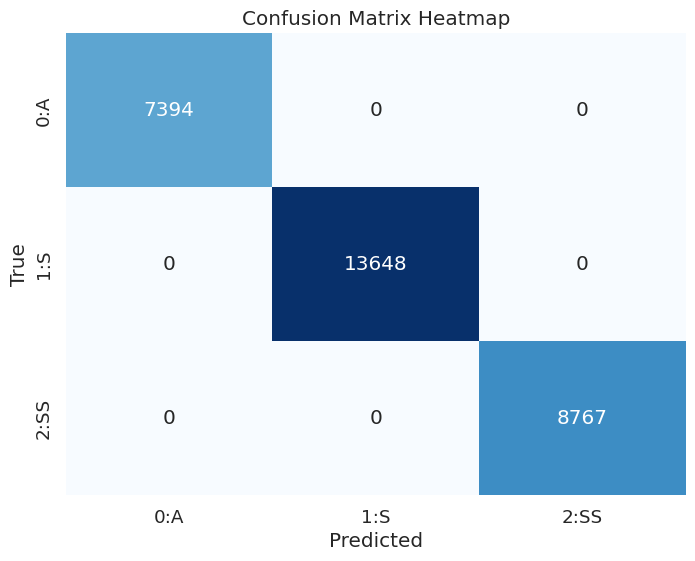


Evaluating Weakest Model: DummyClassifier
Model: DummyClassifier
Training Time: 0.01 seconds
Prediction Time: 0.00 seconds
Accuracy: 0.458
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      7394
           1       0.46      1.00      0.63     13648
           2       0.00      0.00      0.00      8767

    accuracy                           0.46     29809
   macro avg       0.15      0.33      0.21     29809
weighted avg       0.21      0.46      0.29     29809



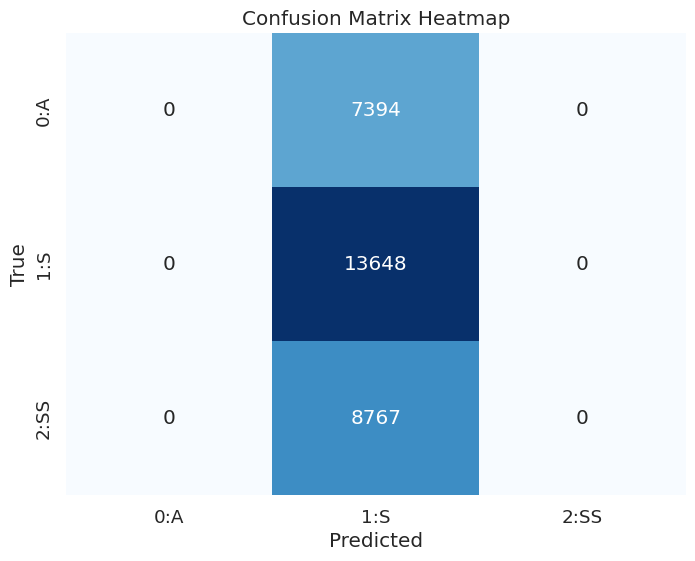

In [ ]:
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from lazypredict.Supervised import LazyClassifier

# Assuming you have already trained LazyPredict and stored the output
# For example:
# clf = LazyClassifier()
# models = clf.fit(X_train, y_train)

# Extract the models DataFrame from the tuple
models_df = models[0]  # The first element of the tuple contains the DataFrame

# Get the best model (first row)
best_model_row = models_df.iloc[0]  # Assuming the first row is the best model
best_model_name = best_model_row.name  # Use .name to get the index name

# For the weakest model (last row)
weakest_model_row = models_df.iloc[-1]  # Assuming the last row is the weakest model
weakest_model_name = weakest_model_row.name  # Use .name to get the index name

# You can use LGBMClassifier as the best model
best_model_class = LGBMClassifier()  # Initialize your actual best model here
# For the weakest model, you can use DummyClassifier
weakest_model_class = DummyClassifier()  # Initialize your actual weakest model here

# Function to evaluate models
def evaluate_model(model_class, X_train, y_train, X_test, y_test):
    # Start the timer
    start_time = time.time()

    # Train the model
    model_class.fit(X_train, y_train)

    # Stop the timer after training
    end_time_training = time.time()

    # Make predictions on the test set
    preds = model_class.predict(X_test)

    # Stop the timer after prediction
    end_time_prediction = time.time()

    # Calculate metrics
    accuracy = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds)
    matrix = confusion_matrix(y_test, preds)

    # Calculate elapsed time
    training_time = end_time_training - start_time
    prediction_time = end_time_prediction - end_time_training

    # Display metrics
    print(f"Model: {model_class.__class__.__name__}")
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"Prediction Time: {prediction_time:.2f} seconds")
    print(f"Accuracy: {round(accuracy, 3)}")
    print("Classification Report:\n", report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix Heatmap")
    plt.show()

# Evaluate the best model
print(f"\nEvaluating Best Model: {best_model_name}")
evaluate_model(best_model_class, X_train, y_train, X_test, y_test)

# Evaluate the weakest model
print(f"\nEvaluating Weakest Model: {weakest_model_name}")
evaluate_model(weakest_model_class, X_train, y_train, X_test, y_test)


#### Plot ROC AUC for Best Model and Weakest Model for Df2 (Deduplicated dataset)


Evaluating Best Model: LGBMClassifier
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 119233, number of used features: 13
[LightGBM] [Info] Start training from score -1.375226
[LightGBM] [Info] Start training from score -0.783503
[LightGBM] [Info] Start training from score -1.236446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

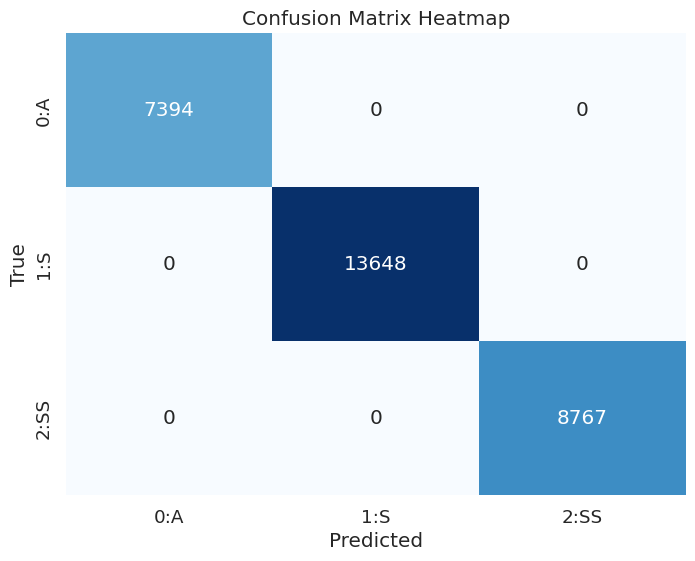

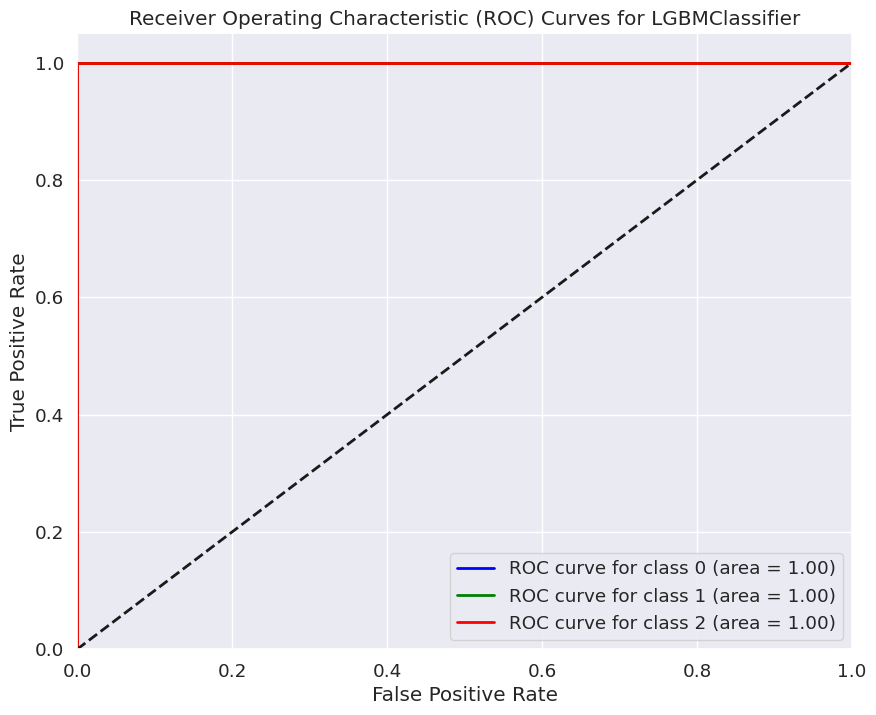


Evaluating Weakest Model: DummyClassifier
Model: DummyClassifier
Training Time: 0.01 seconds
Prediction Time: 0.00 seconds
Accuracy: 0.458
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      7394
           1       0.46      1.00      0.63     13648
           2       0.00      0.00      0.00      8767

    accuracy                           0.46     29809
   macro avg       0.15      0.33      0.21     29809
weighted avg       0.21      0.46      0.29     29809



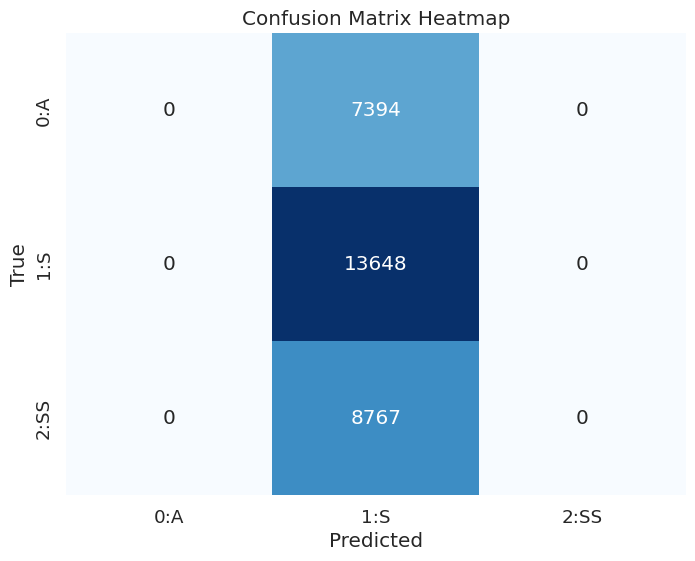

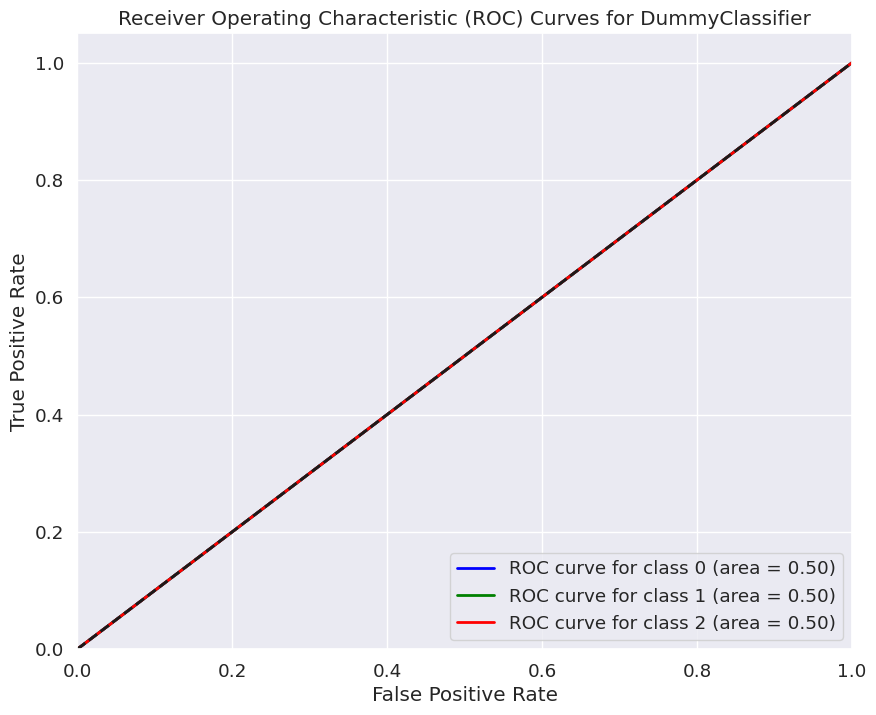

In [ ]:
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Assuming 'models' is the tuple returned from LazyClassifier
models_df = models[0]  # Extract the DataFrame from the tuple

# Get the best model (first row)
best_model_row = models_df.iloc[0]  # Assuming the first row is the best model
best_model_name = best_model_row.name  # Correctly access the row index
best_model_class = LGBMClassifier()  # Replace with the actual best model class instance

# For the weakest model (last row)
weakest_model_row = models_df.iloc[-1]  # Assuming the last row is the weakest model
weakest_model_name = weakest_model_row.name  # Correctly access the row index
weakest_model_class = DummyClassifier()  # Replace with the actual weakest model class instance

# Function to evaluate models
def evaluate_model(model_class, X_train, y_train, X_test, y_test):
    # Start the timer
    start_time = time.time()

    # Train the model
    model_class.fit(X_train, y_train)

    # Stop the timer after training
    end_time_training = time.time()

    # Make predictions on the test set
    preds = model_class.predict(X_test)

    # Stop the timer after prediction
    end_time_prediction = time.time()

    # Calculate metrics
    accuracy = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds)
    matrix = confusion_matrix(y_test, preds)

    # Calculate elapsed time
    training_time = end_time_training - start_time
    prediction_time = end_time_prediction - end_time_training

    # Display metrics
    print(f"Model: {model_class.__class__.__name__}")
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"Prediction Time: {prediction_time:.2f} seconds")
    print(f"Accuracy: {round(accuracy, 3)}")
    print("Classification Report:\n", report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix Heatmap")
    plt.show()

    # Compute ROC curve and ROC area
    y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
    preds_proba = model_class.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(y_test_binarized.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], preds_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'green', 'red']
    for i, color in zip(range(y_test_binarized.shape[1]), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve for class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curves for {model_class.__class__.__name__}')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate the best model
print(f"\nEvaluating Best Model: {best_model_name}")
evaluate_model(best_model_class, X_train, y_train, X_test, y_test)

# Evaluate the weakest model
print(f"\nEvaluating Weakest Model: {weakest_model_name}")
evaluate_model(weakest_model_class, X_train, y_train, X_test, y_test)


In [ ]:
You’ve built your machine learning model – so what’s next? You need to evaluate and validate how good (or bad) it is, so you can decide whether to
implement it. That’s where the AUC ROC curve comes in. ROC AUC meaning we are we are calculating the “Area Under the Curve” (AUC) of the “Receiver
Operating Characteristic” (ROC). Helps us visualize how well our machine learning classifier performs.

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the
TPR (sensitivity) against FPR (specificity) at various threshold values and essentially separates the ‘signal’ from the ‘noise.’ In other words, it shows the performance of a
classification model at all classification thresholds. The Area Under the Curve (AUC) is the measure of the ability of a binary classifier to
distinguish between classes and is used as a summary of the ROC curve.

The ROC (Receiver Operating Characteristic) curve is like a graph that shows how good a model is at telling things apart. It helps us see how often the
model correctly identifies positive things and how often it correctly avoids labeling negative things as positive. So, it basically shows how well the
model is working for binary classification tasks.

When AUC = 1, the classifier can correctly distinguish between all the Positive and the Negative class points. If, however, the AUC had been 0, then the
classifier would predict all Negatives as Positives and all Positives as Negatives.
When 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative ones. This is so
because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.
When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. Meaning that the classifier either predicts a
random class or a constant class for all the data points.

So, the higher the AUC value for a classifier, the better its ab
https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

### 3. Lazypredict on PCA - Apply Principal Component Analysis (PCA)¶

In [ ]:
X_pca

array([[ 1.34457463,  1.76677468, -2.59421518, ...,  0.21728642,
        -0.89505492,  2.03194777],
       [ 1.27688857,  1.74537294, -2.56140796, ...,  0.28262276,
        -0.88047346,  2.06860991],
       [ 0.9758632 ,  1.68590471, -2.367673  , ...,  0.23470001,
        -0.64657491,  1.93642163],
       ...,
       [ 1.29727407, -1.86777321,  1.47211853, ..., -1.0418528 ,
         0.72710751, -0.57012231],
       [ 1.29683498, -1.86844898,  1.47246202, ..., -1.04234464,
         0.72740547, -0.57095737],
       [ 1.29639656, -1.86912358,  1.47280459, ..., -1.04283543,
         0.72770296, -0.57179095]])

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Assuming X_pca is your PCA-transformed dataset and 'Prediction' is your target column
# Convert X_pca (NumPy array) back to a DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])  # Rename columns as PC1, PC2, etc.
# Add the target column to the DataFrame (ensure you have the target variable in the same shape)
X_pca_df['Prediction'] = y  # y should be the original target variable

# Now, separate features and target variable
X = X_pca_df.drop(columns=['Prediction'])  # Features
y = X_pca_df['Prediction']                  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit LazyClassifier
lazy_classifier = LazyClassifier()
models = lazy_classifier.fit(X_train, X_test, y_train, y_test)

# Display the results
print(models)


 38%|███████████████████████████████████████████████████████████████████████▎                                                                                                                    | 11/29 [01:37<01:23,  4.66s/it]

##### Evaluate best model) and DummyClassifier (weakest model) for X_pca (PCA dataset)

##### Training Time, Prediction Time, Accuracy, Classification Report, Confusion Matrix and Plot ROC AUC for Best Model and Weakest Model for PCA dataset